# Task-2 Prediction using Unsupervised ML
**BY - VISHAL SONI**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Loading data
data(iris)

# Structure
str(iris)


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
# Loading package
library(ClusterR)
library(cluster)

In [3]:
# Removing initial label of 
# Species from original dataset
iris_1 <- iris[, -5]

In [4]:
# Fitting K-Means clustering Model 
# to training dataset
set.seed(240) # Setting seed
kmeans.re <- kmeans(iris_1, centers = 3, nstart = 20)
kmeans.re

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

The 3 clusters are made which are of 50, 62, and 38 sizes respectively. Within the cluster, the sum of squares is 88.4%.

In [5]:
# Cluster identification for 
# each observation
kmeans.re$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

The model achieved an accuracy of 100% with a p-value of less than 1. This indicates the model is good.

In [6]:
# Confusion Matrix
cm <- table(iris$Species, kmeans.re$cluster)
cm

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

So, 50 Setosa are correctly classified as Setosa. Out of 62 Versicolor, 48 Versicolor are correctly classified as Versicolor and 14 are classified as virginica. Out of 36 virginica, 19 virginica are correctly classified as virginica and 2 are classified as Versicolor.

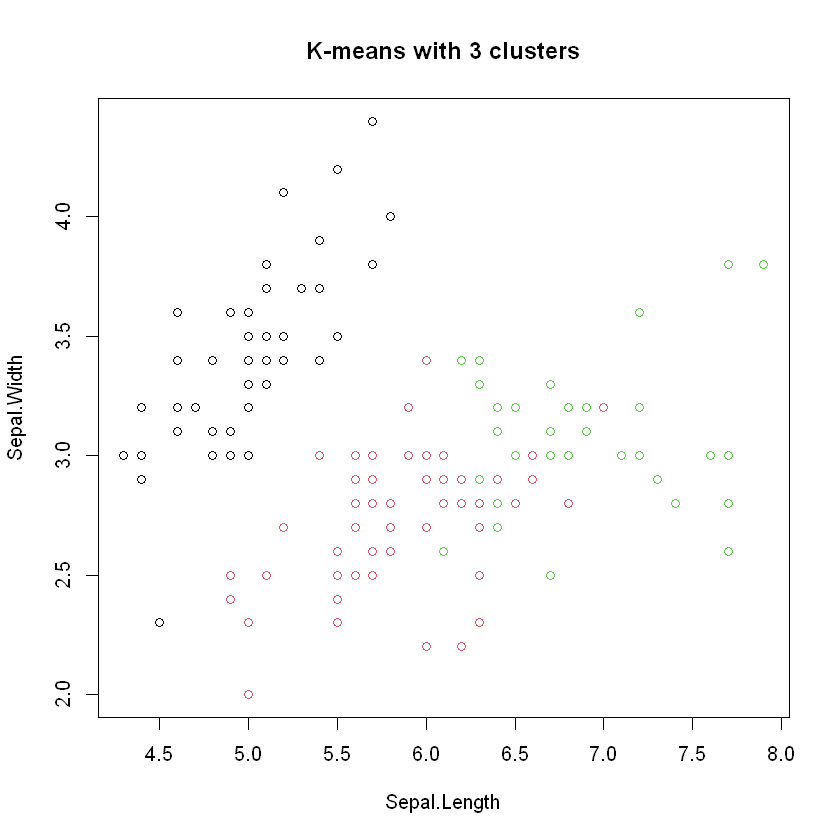

In [16]:
# Model Evaluation and visualization
plot(iris_1[c("Sepal.Length", "Sepal.Width")], 
     col = kmeans.re$cluster, 
     main = "K-means with 3 clusters")

The model showed 3 cluster plots with three different colors and with Sepal.length and with Sepal.width.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871
3,6.850000,3.073684,5.742105,2.071053


,Sepal.Length,Sepal.Width
1,5.006000,3.428000
2,5.901613,2.748387
3,6.850000,3.073684


integer(0)

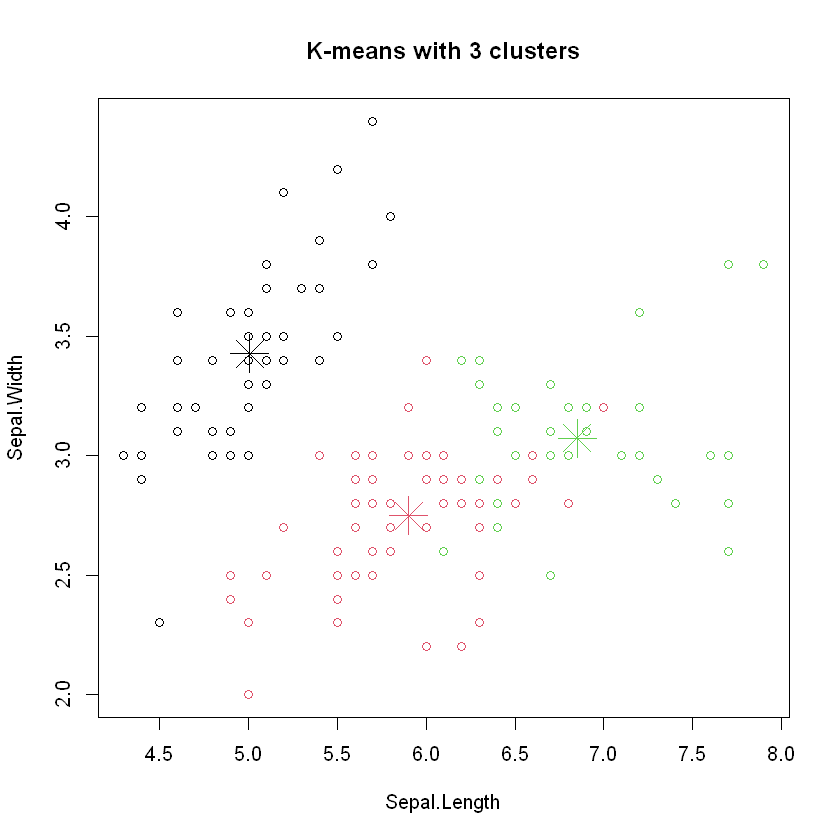

In [17]:
## Plotiing cluster centers
kmeans.re$centers
kmeans.re$centers[, c("Sepal.Length", "Sepal.Width")]
# cex is font size, pch is symbol
plot(iris_1[c("Sepal.Length", "Sepal.Width")], 
     col = kmeans.re$cluster, 
     main = "K-means with 3 clusters")+
        points(kmeans.re$centers[, c("Sepal.Length", "Sepal.Width")], 
           col = 1:3, pch = 8, cex = 3) 

In the plot, centers of clusters are marked with cross signs with the same color of the cluster.

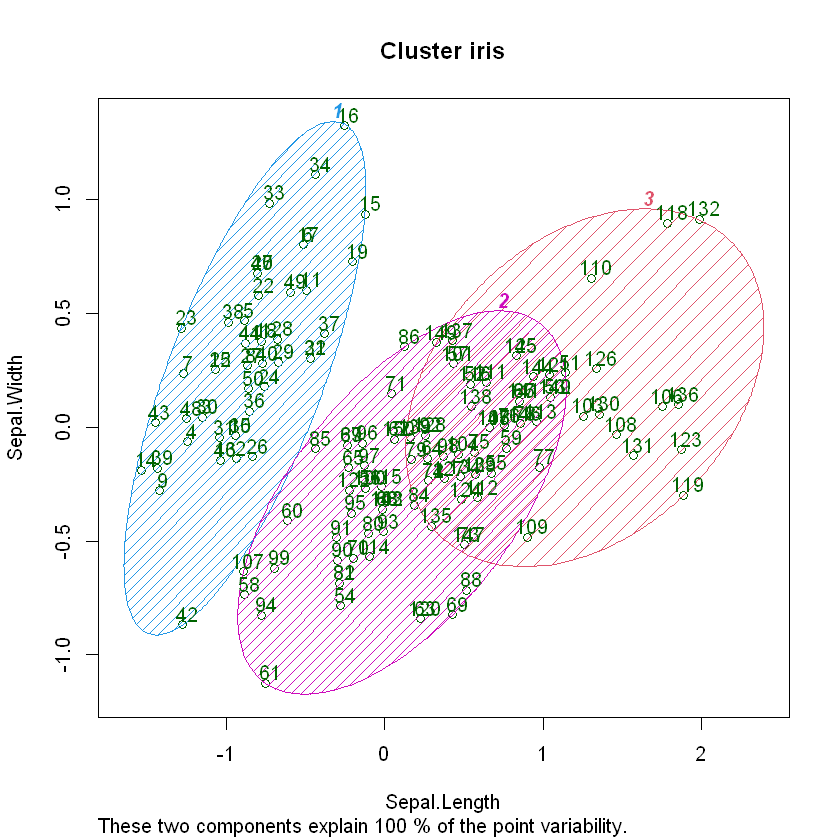

In [10]:
## Visualizing clusters
y_kmeans <- kmeans.re$cluster
clusplot(iris_1[, c("Sepal.Length", "Sepal.Width")],
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste("Cluster iris"),
         xlab = 'Sepal.Length',
         ylab = 'Sepal.Width')

So, 3 clusters are formed with varying sepal length and sepal width. Hence, the K-Means clustering algorithm is widely used in the industry.